# Kalman Filter

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Kalman-filter_en.svg/1024px-Kalman-filter_en.svg.png)

$$
\begin{align*}
\text{Prediction:} \quad & \hat{x}_{k|k-1} = F \cdot \hat{x}_{k-1} \\
& P_{k|k-1} = F \cdot P_{k-1} \cdot F^T + Q \\
\text{Update:} \quad & K_k = \frac{P_{k|k-1}}{P_{k|k-1} + R} \\
& \hat{x}_k = \hat{x}_{k|k-1} + K_k \cdot (z_k - \hat{x}_{k|k-1}) \\
& P_k = (1 - K_k) \cdot P_{k|k-1}
\end{align*}
$$

where
$$
\begin{align*}
    & \hat{x}_{k|k-1} \text{ is the predicted state at time } k, \\
    & \hat{x}_k \text{ is the updated state at time } k, \\
    & P_{k|k-1} \text{ is the predicted error covariance at time } k, \\
    & P_k \text{ is the updated error covariance at time } k, \\
    & F \text{ is the state transition matrix,} \\
    & Q \text{ is the process variance (covariance of the process noise),} \\
    & R \text{ is the measurement variance (covariance of the measurement noise),} \\
    & K_k \text{ is the Kalman gain at time } k, \\
    & z_k \text{ is the measurement at time } k.
\end{align*}
$$

## References

- kalmanfilter.net: [Kalman Filter in Once Dimension](https://www.kalmanfilter.net/kalman1d.html)

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import pi

from IPython.display import display, Math, Latex

In [23]:
size = 1000
t = np.arange(size)
truth = np.cos(np.pi*t/2500)
sig = truth+np.random.normal(0,0.005,size)

In [38]:
mu = np.mean(sig)
sigma = np.std(sig)
print(f"mu: {mu}  sigma: {sigma}  var: {sigma**2}")

mu: 0.7571295819637126  sigma: 0.209877205647058  var: 0.044048441450217475


In [44]:
class kalman_filter:
    def __init__(self, process_variance, measurement_variance):
        self.P = 1.0  # Initial estimate error
        self.F = 1.0  # Assuming constant velocity
        self.x = 1.0
        self.Q = process_variance
        self.R = measurement_variance
        
    def filter(self,z):
        # Prediction
        x = self.x * self.F
        P = self.F*self.F*self.P + self.Q
    
        # Update
        K = P / (P + self.R)
        self.x = x + K * (z - x)
        self.P = (1 - K) * P
    
        return self.x

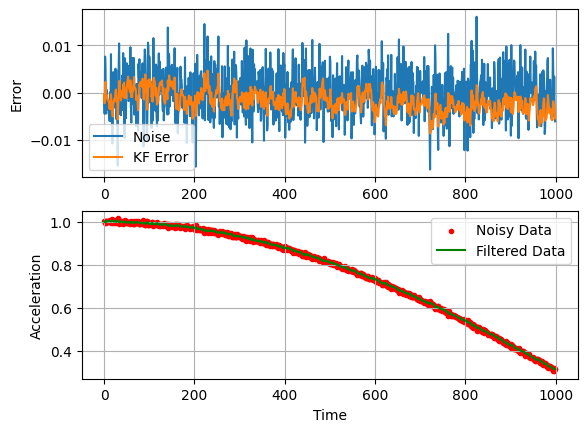

In [45]:
# Set parameters for the Kalman filter
Q = 0.05  # Process noise
R = 0.50  # Measurement noise
kf = kalman_filter(Q,R)

# Apply the Kalman filter
filtered_data = []
for data in sig:
    data = kf.filter(data)
    filtered_data.append(data)

# Plot the results
plt.subplot(2,1,1)
plt.plot(truth-sig, label='Noise')
plt.plot(truth-filtered_data, label='KF Error')
plt.legend()
# plt.xlabel('Time')
plt.ylabel('Error')
plt.grid(True)

plt.subplot(2,1,2)
plt.scatter(range(len(sig)), sig, label='Noisy Data', color='red', marker='.')
plt.plot(filtered_data, label='Filtered Data', color='green')
plt.legend()
# plt.title('1D Kalman Filter for Accelerometer Data')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.grid(True)

In [20]:
np.sqrt(.5)

0.7071067811865476